## Clustering: UCI Seeds Dataset
https://archive.ics.uci.edu/ml/datasets/seeds

** Dataset Information: **

three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment

** Attribute Information:**

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

** Objective of this project **

cluster into 3 groups

## Data

In [31]:
# Load Data
df  <- read.csv('seeds_dataset.csv')

In [32]:
# Inspect Data
head(df,3)

area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove
15.26,14.84,0.8710,5.763,3.312,2.221,5.220
14.88,14.57,0.8811,5.554,3.333,1.018,4.956
14.29,14.09,0.9050,5.291,3.337,2.699,4.825


In [33]:
dim(df)

[1] 210   7

In [34]:
str(df)

'data.frame':	210 obs. of  7 variables:
 $ area                 : num  15.3 14.9 14.3 13.8 16.1 ...
 $ perimeter            : num  14.8 14.6 14.1 13.9 15 ...
 $ compactness          : num  0.871 0.881 0.905 0.895 0.903 ...
 $ length_of_kernel     : num  5.76 5.55 5.29 5.32 5.66 ...
 $ width_of_kernel      : num  3.31 3.33 3.34 3.38 3.56 ...
 $ asymmetry_coefficient: num  2.22 1.02 2.7 2.26 1.35 ...
 $ length_of_groove     : num  5.22 4.96 4.83 4.8 5.17 ...


In [35]:
summary(df)

      area         perimeter      compactness     length_of_kernel
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899   
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262   
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524   
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629   
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980   
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675   
 width_of_kernel asymmetry_coefficient length_of_groove
 Min.   :2.630   Min.   :0.765         Min.   :4.519   
 1st Qu.:2.944   1st Qu.:2.562         1st Qu.:5.045   
 Median :3.237   Median :3.599         Median :5.223   
 Mean   :3.259   Mean   :3.700         Mean   :5.408   
 3rd Qu.:3.562   3rd Qu.:4.769         3rd Qu.:5.877   
 Max.   :4.033   Max.   :8.456         Max.   :6.550   

In [36]:
any(is.na(df))

[1] FALSE

In [37]:
seed = 101
set.seed(seed)

## 1. K Means Clustering

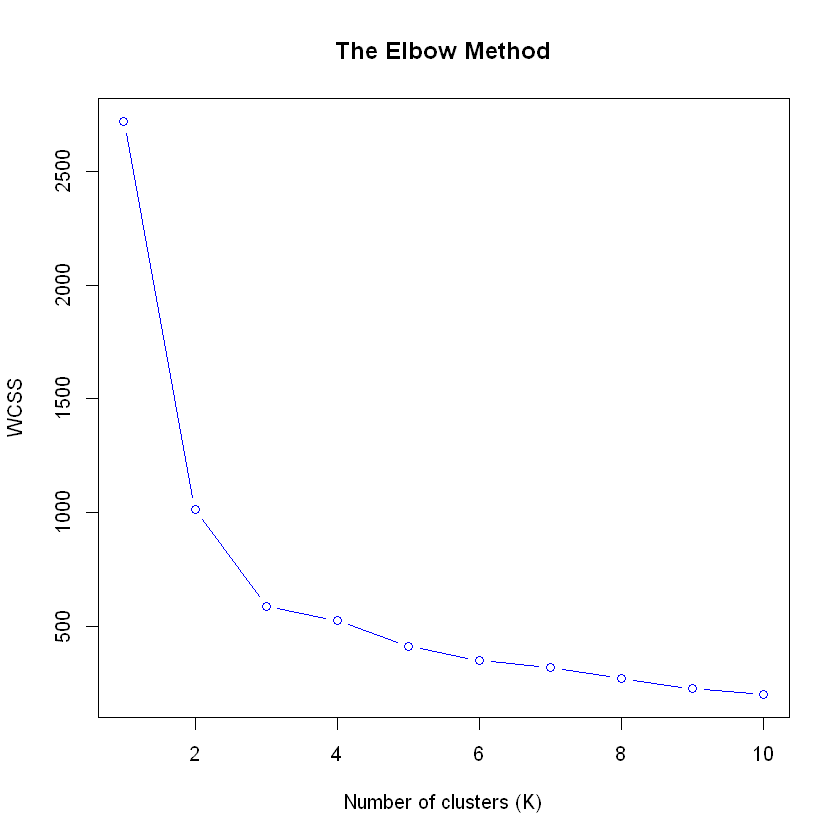

In [38]:
# Use the elbow method to find the optimal K, if k is unknown 
wcss = vector()
for (i in 1:10) wcss[i] = sum(kmeans(df, i)$withinss)
plot(1:10, wcss, type = 'b', col = 'blue', #within-cluster sum of squares
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters (K)',
     ylab = 'WCSS')

In [39]:
# Fit K-Means to the dataset
set.seed(seed)
kmeans = kmeans(x = df, centers = 3)
y_kmeans = kmeans$cluster

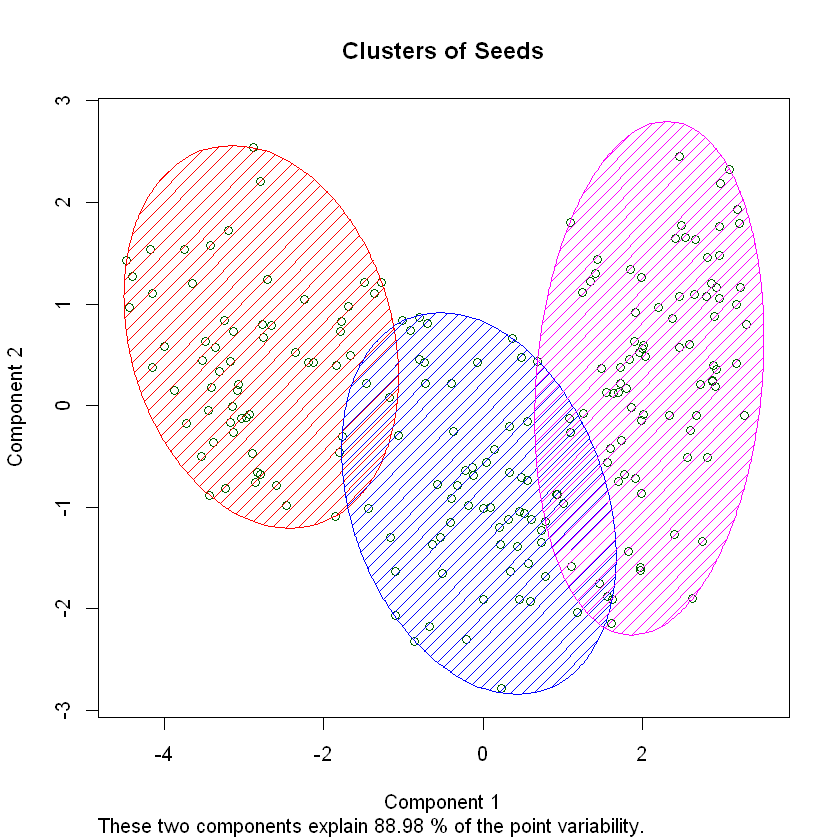

In [40]:
# Visualize the clusters
library(cluster)
clusplot(df,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 0,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Clusters of Seeds'))

## 2. Hierarchical Clustering

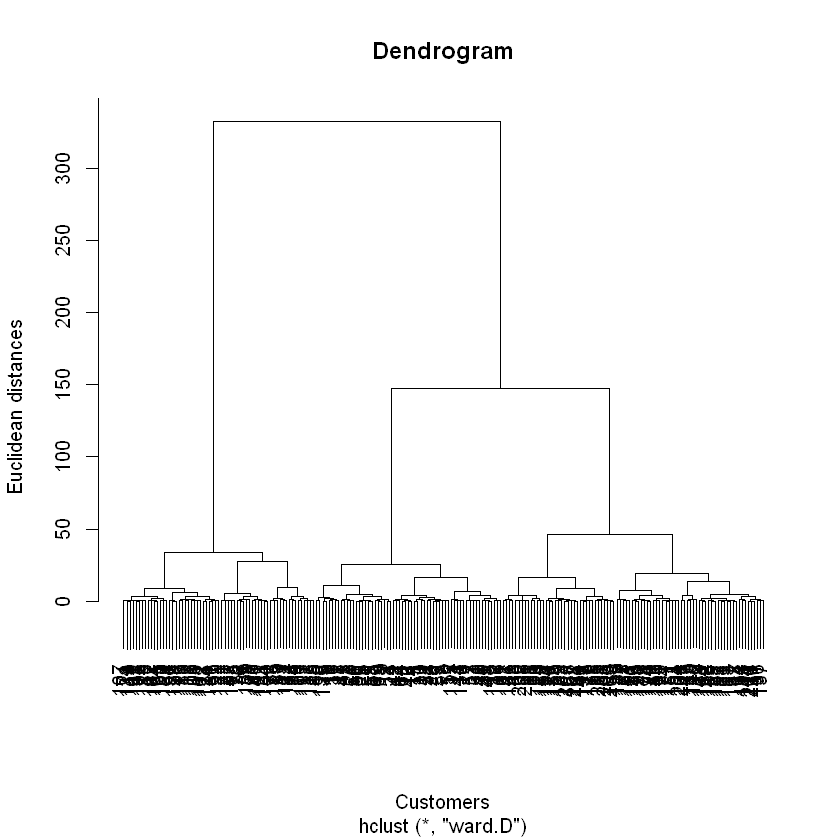

In [41]:
# Use the dendrogram to find the optimal number of clusters, if k is unknown
dendrogram = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendrogram'),
     xlab = 'Customers',
     ylab = 'Euclidean distances')

In [42]:
# Fit hc to the dataset  
hc = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 3)

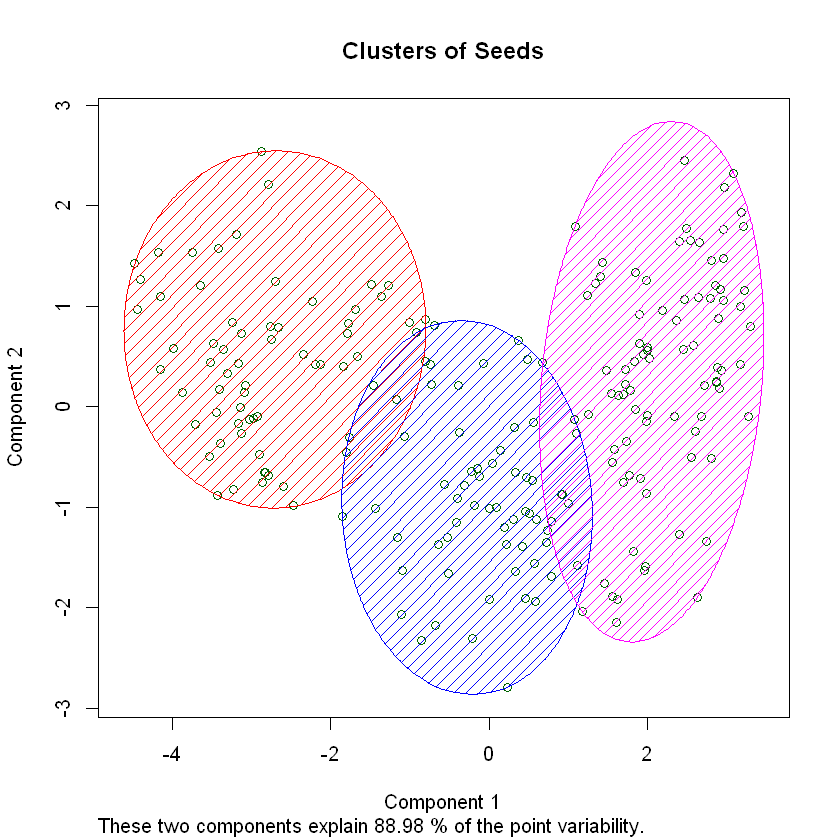

In [43]:
# Visualize the clusters
library(cluster)
clusplot(df,y_hc,lines = 0,shade = TRUE,color = TRUE,labels= 0,
         plotchar = FALSE,span = TRUE,
         main = paste('Clusters of Seeds'))